## Import

In [427]:
import os

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## Data csv _ Read

In [428]:
data_path = os.getenv('homepath') + '/Desktop/python/Dataton'
lol_data = pd.read_csv(data_path + '/high_diamond_ranked_10min.csv')
lol_win_data = pd.read_excel(data_path + '/win.xlsx')
m_lol_data = pd.read_csv(data_path + '/Hight_rank/Master_Ranked_Games.csv')
g_lol_data = pd.read_csv(data_path + '/Hight_rank/GrandMaster_Ranked_Games.csv')
c_lol_data = pd.read_csv(data_path + '/Hight_rank/Challenger_Ranked_Games.csv')

lol_data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [429]:
c_lol_data.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141


In [430]:
g_lol_data.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
1,4233222221,1686,0,0,1,0,0,0,0,0,...,59,78424,58032,640,73,14.6,214,5,31415,61040
2,4233113995,1588,1,1,1,1,0,1,2,1,...,30,62134,47408,608,63,12.6,133,5,27846,32107
3,4229230455,1126,1,0,1,0,1,0,1,0,...,13,32999,32064,461,53,10.6,92,3,23511,10775
4,4228244819,1262,1,0,0,0,1,1,3,0,...,5,35272,35372,506,54,10.8,113,2,17891,24158


In [431]:
m_lol_data.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4227123625,1429,0,1,1,0,0,0,0,0,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,4219545724,1313,0,0,1,0,0,0,0,0,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,4219463634,1660,1,0,0,1,1,1,1,1,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,4205778093,984,1,1,1,0,1,0,2,0,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,4201063474,1437,0,1,1,0,1,0,2,0,...,39,71794,45798,565,68,13.6,150,7,47523,47150


In [432]:
m_lol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107125 entries, 0 to 107124
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameId                   107125 non-null  int64  
 1   gameDuraton              107125 non-null  int64  
 2   blueWins                 107125 non-null  int64  
 3   blueFirstBlood           107125 non-null  int64  
 4   blueFirstTower           107125 non-null  int64  
 5   blueFirstBaron           107125 non-null  int64  
 6   blueFirstDragon          107125 non-null  int64  
 7   blueFirstInhibitor       107125 non-null  int64  
 8   blueDragonKills          107125 non-null  int64  
 9   blueBaronKills           107125 non-null  int64  
 10  blueTowerKills           107125 non-null  int64  
 11  blueInhibitorKills       107125 non-null  int64  
 12  blueWardPlaced           107125 non-null  int64  
 13  blueWardkills            107125 non-null  int64  
 14  blue

In [433]:
lol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [434]:
print(lol_data.shape)
print(lol_data.columns)

(9879, 40)
Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')


In [435]:
Og_lol = lol_data.copy()
y = lol_data['blueWins']

del lol_data['gameId']

y

0       0
1       0
2       0
3       0
4       0
       ..
9874    1
9875    1
9876    0
9877    0
9878    1
Name: blueWins, Length: 9879, dtype: int64

## 결측값 찾기

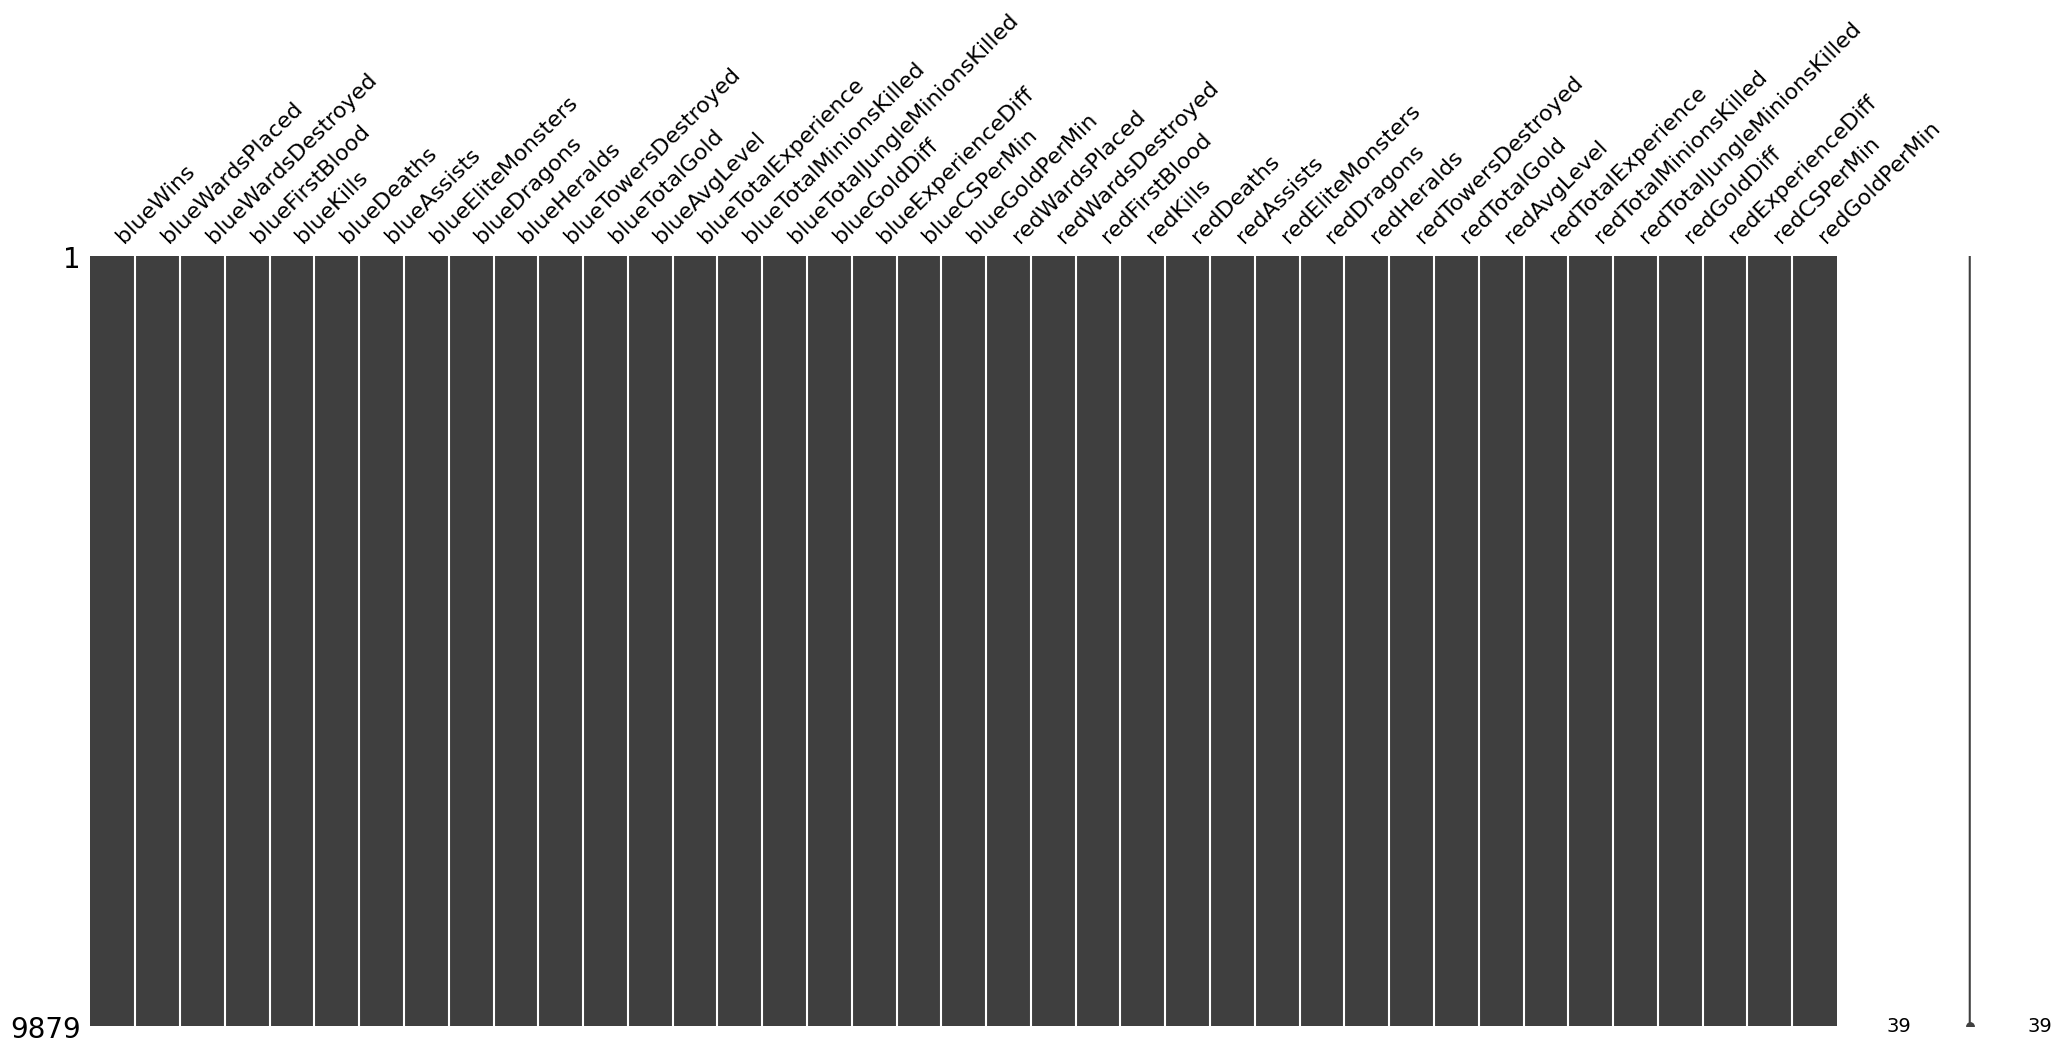

In [436]:
msno.matrix(lol_data)
plt.show()

In [437]:
lol_data.isnull().sum()

blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds                      0
redTowersDestr

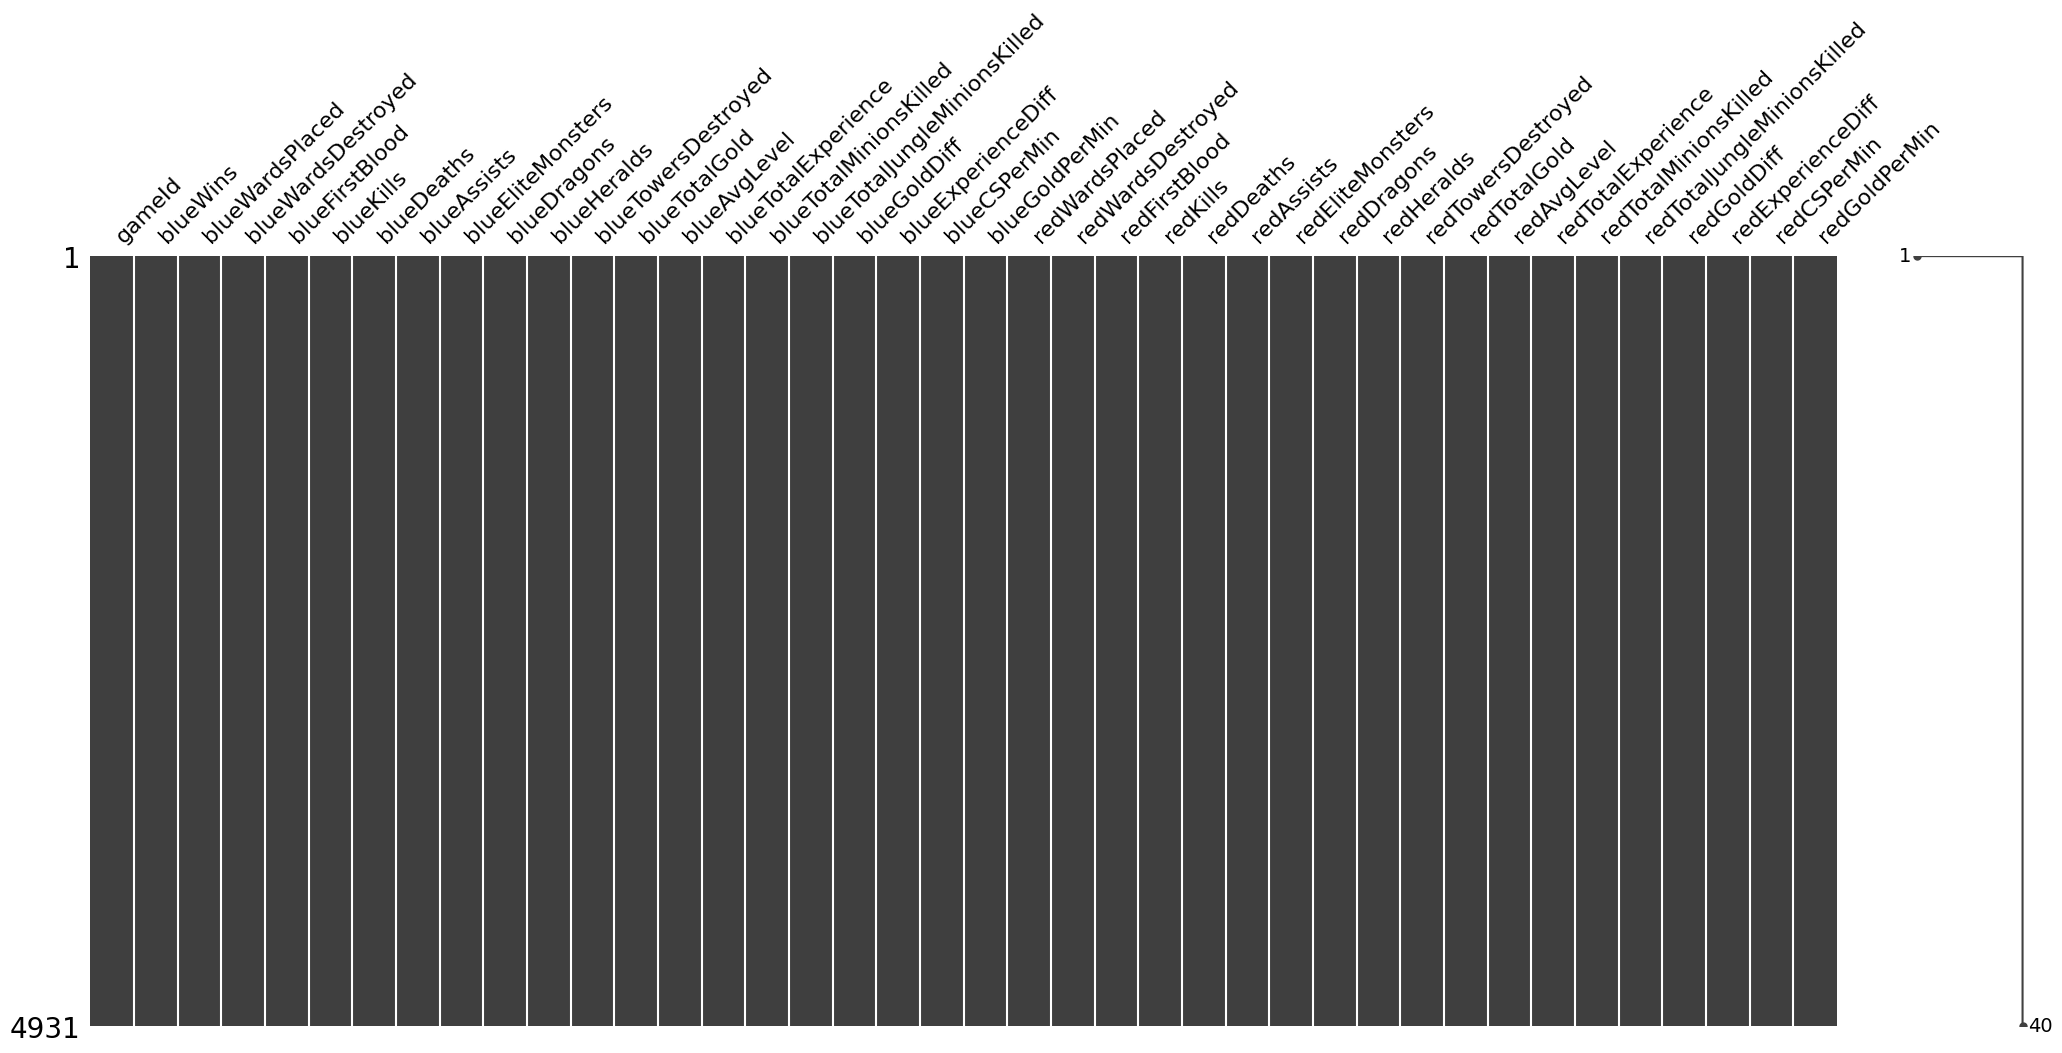

In [438]:
msno.matrix(lol_win_data)
plt.show()

In [439]:
lol_win_data.isnull().sum()

gameId                          1
blueWins                        0
blueWardsPlaced                 1
blueWardsDestroyed              1
blueFirstBlood                  1
blueKills                       1
blueDeaths                      1
blueAssists                     1
blueEliteMonsters               1
blueDragons                     1
blueHeralds                     1
blueTowersDestroyed             1
blueTotalGold                   1
blueAvgLevel                    1
blueTotalExperience             1
blueTotalMinionsKilled          1
blueTotalJungleMinionsKilled    1
blueGoldDiff                    1
blueExperienceDiff              1
blueCSPerMin                    1
blueGoldPerMin                  1
redWardsPlaced                  1
redWardsDestroyed               1
redFirstBlood                   1
redKills                        1
redDeaths                       1
redAssists                      1
redEliteMonsters                1
redDragons                      1
redHeralds    

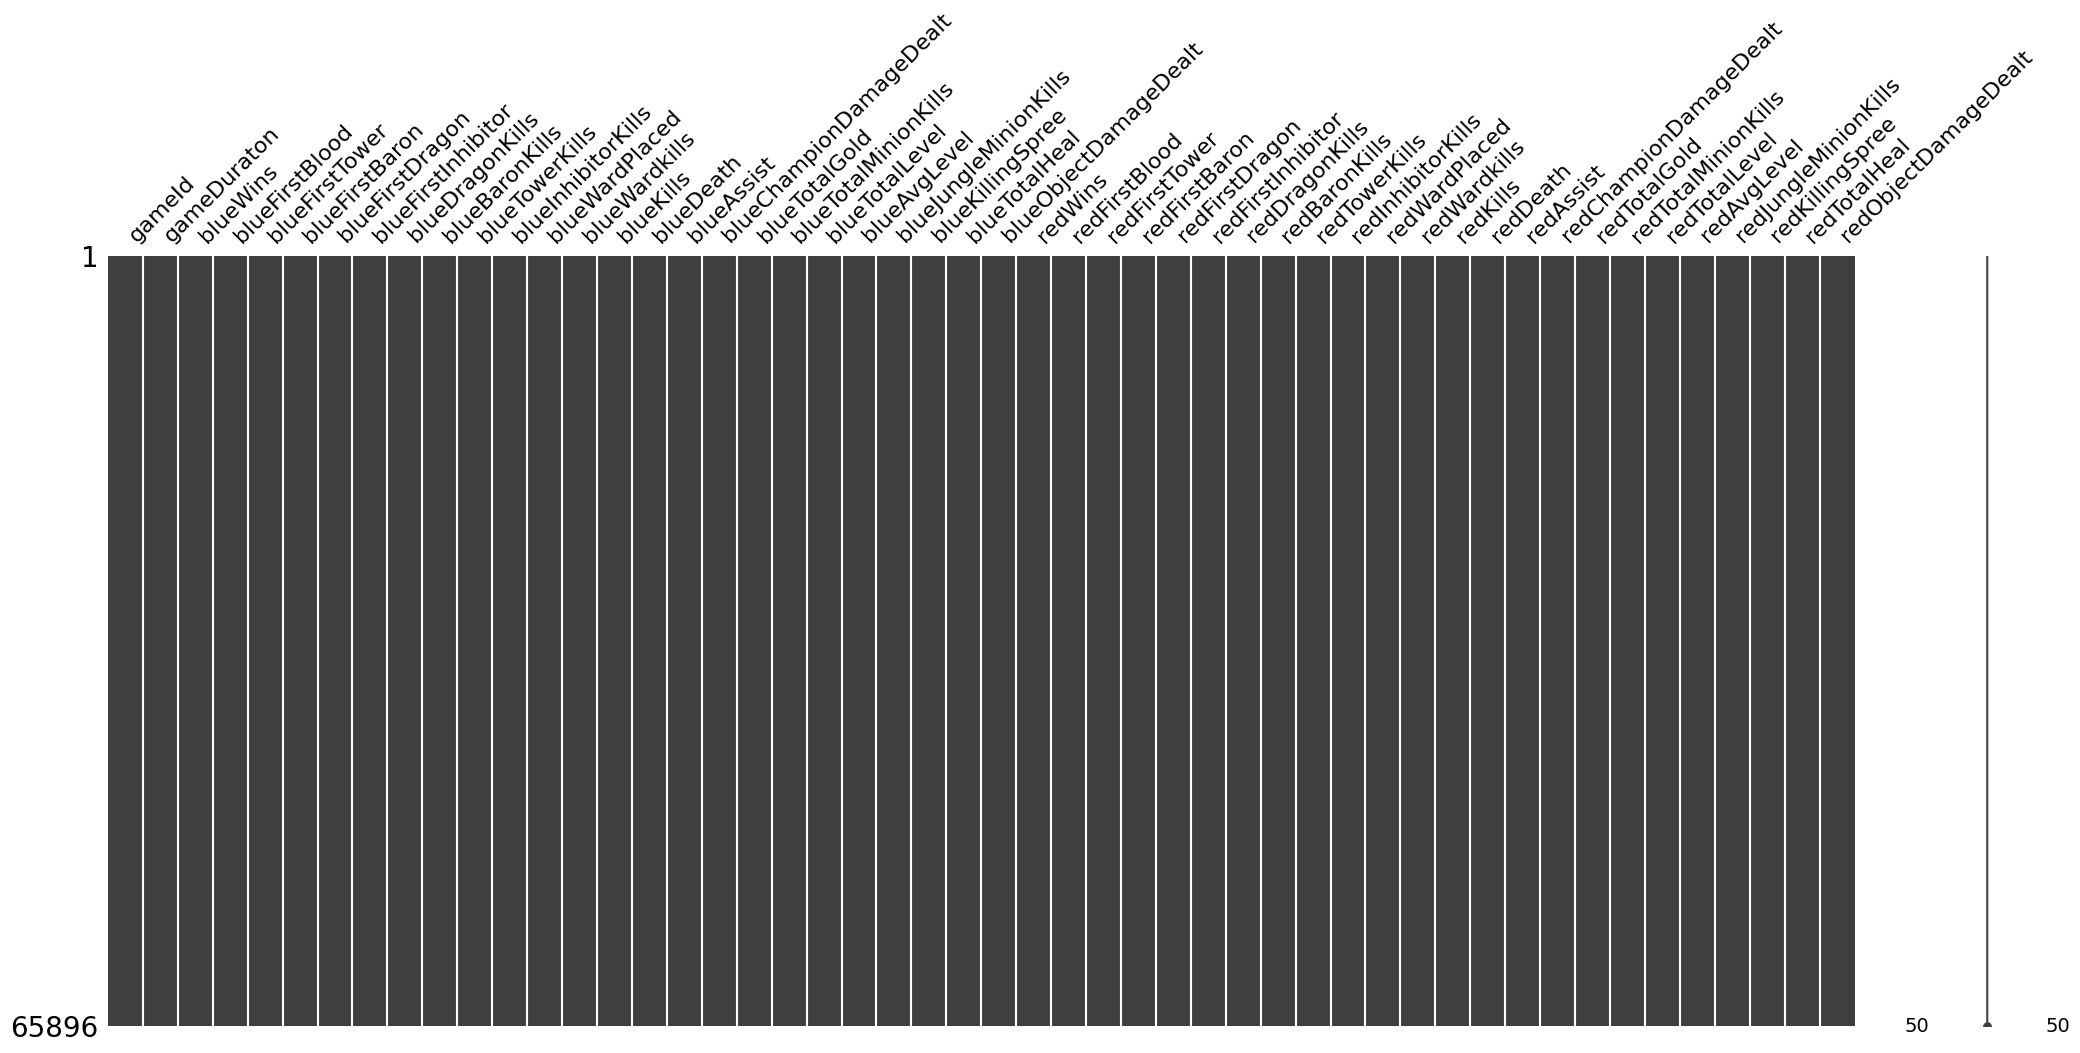

In [440]:
msno.matrix(g_lol_data)
plt.show()

In [441]:
g_lol_data.isnull().sum()

gameId                     0
gameDuraton                0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueAvgLevel               0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redWins                    0
redFirstBlood              0
redFirstTower              0
redFirstBaron              0
redFirstDragon             0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              0
redTowerKills 

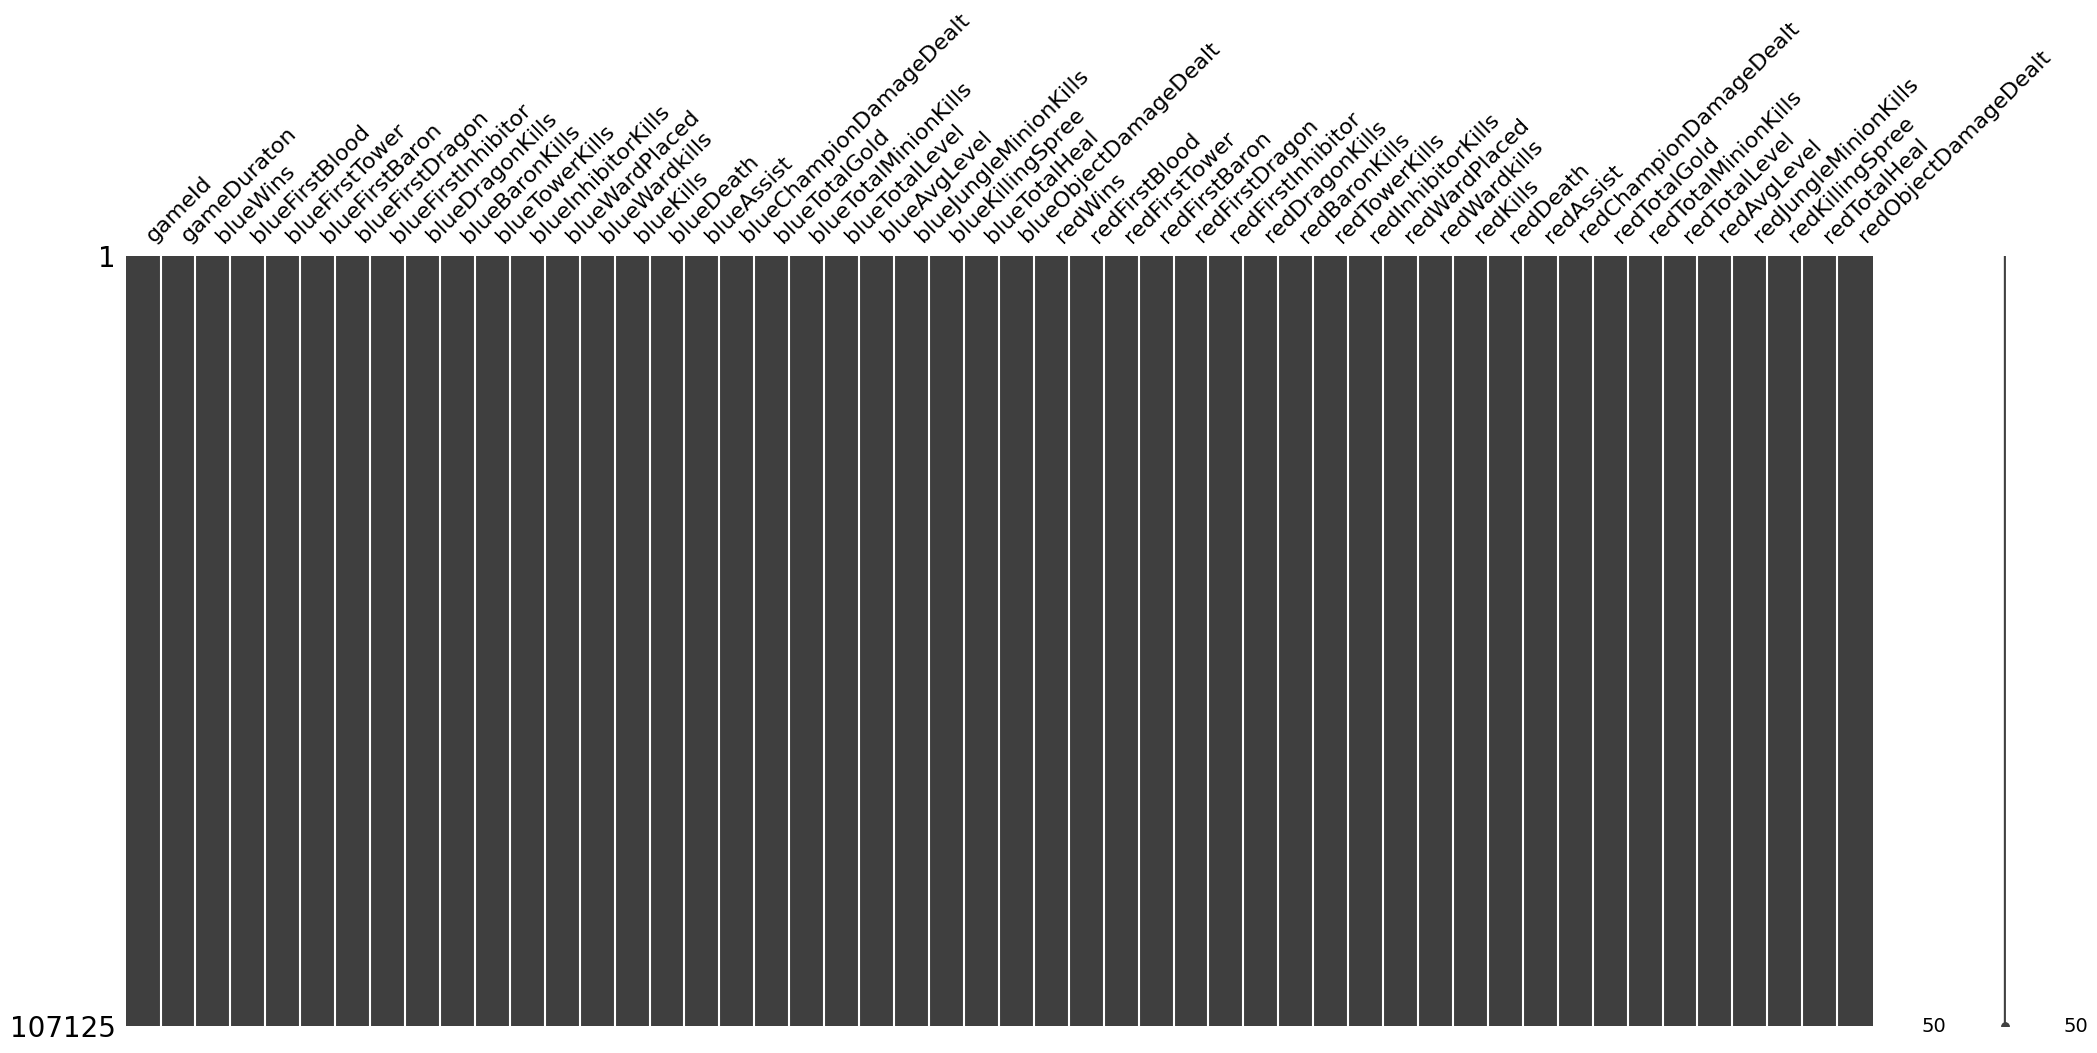

In [442]:
msno.matrix(m_lol_data)
plt.show()

In [443]:
m_lol_data.isnull().sum()

gameId                     0
gameDuraton                0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueAvgLevel               0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redWins                    0
redFirstBlood              0
redFirstTower              0
redFirstBaron              0
redFirstDragon             0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              0
redTowerKills 

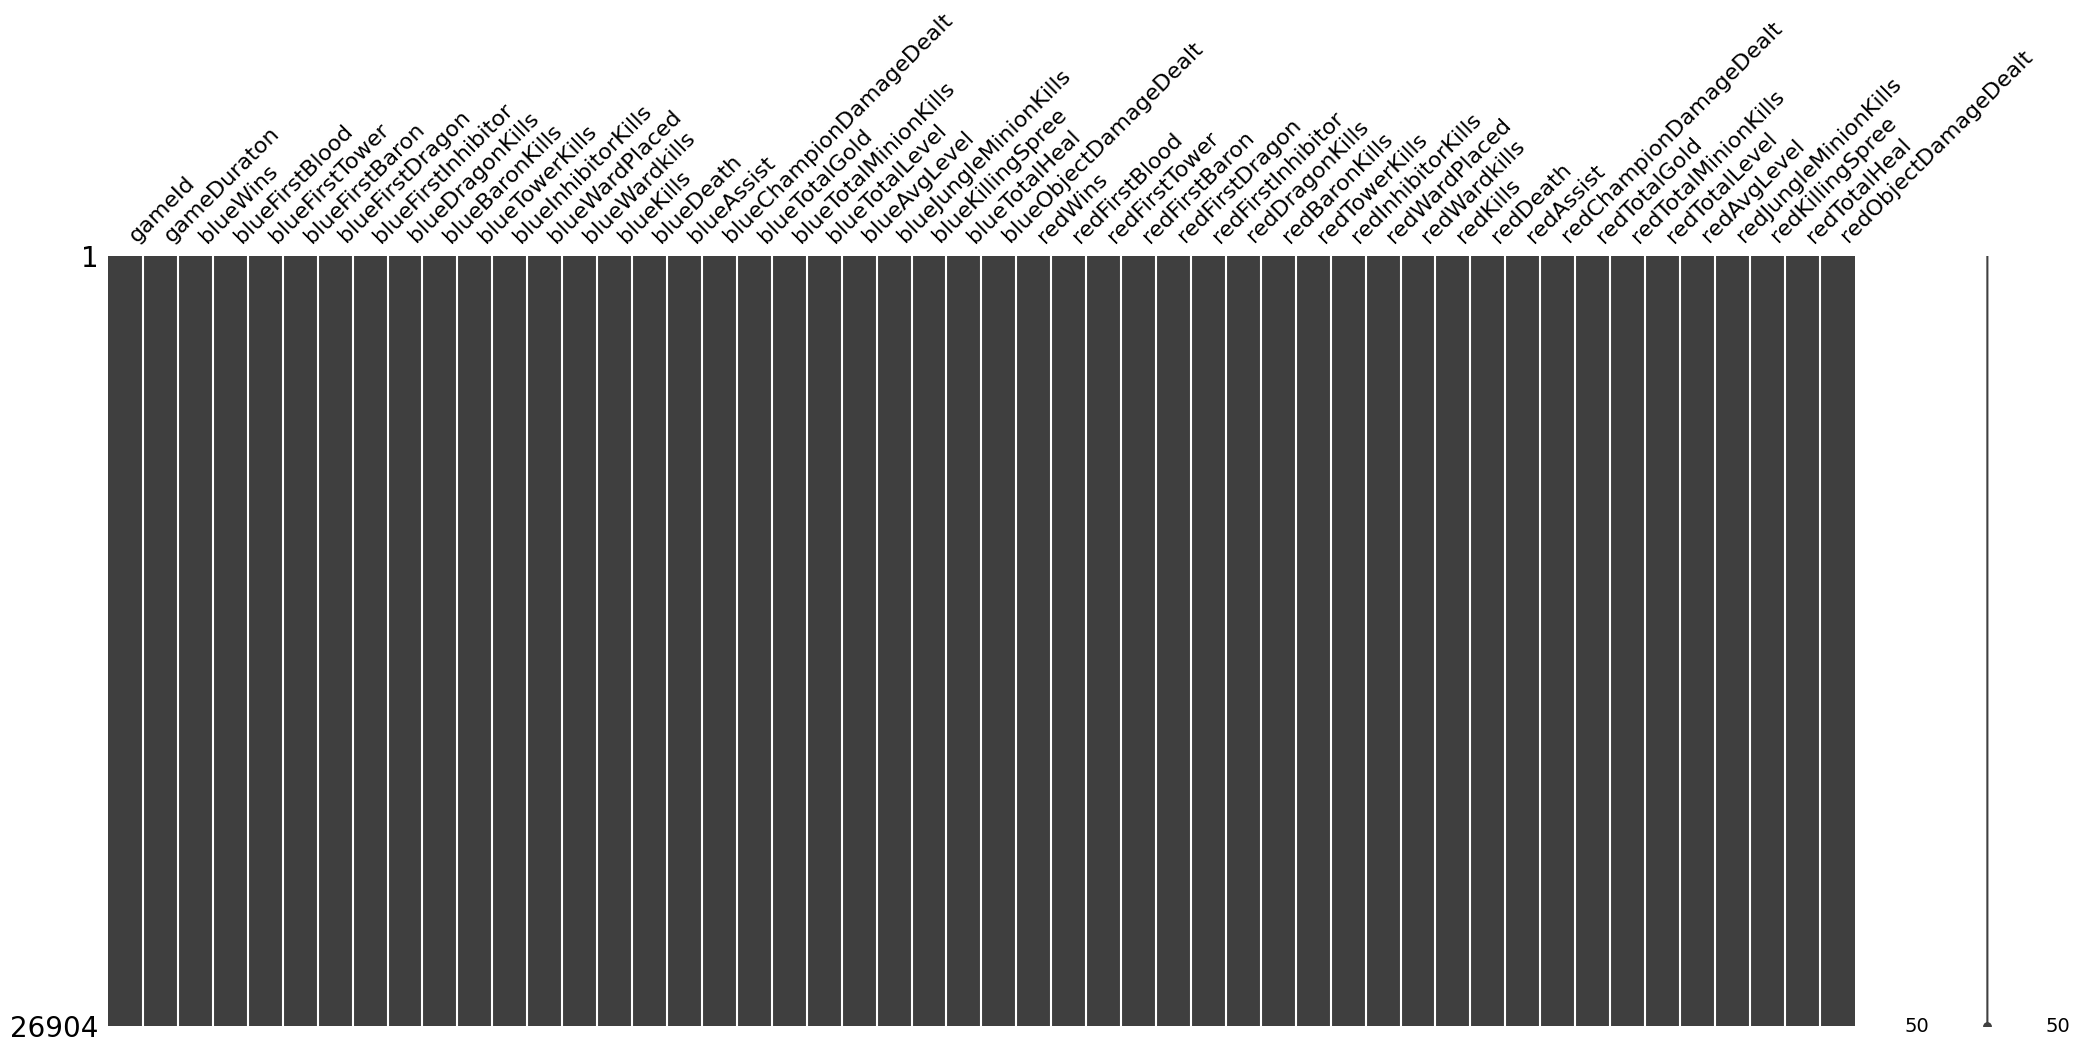

In [444]:
msno.matrix(c_lol_data)
plt.show()

In [445]:
c_lol_data.isnull().sum()

gameId                     0
gameDuraton                0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueAvgLevel               0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redWins                    0
redFirstBlood              0
redFirstTower              0
redFirstBaron              0
redFirstDragon             0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              0
redTowerKills 

결측값 없음 확인

## 데이터 시각화

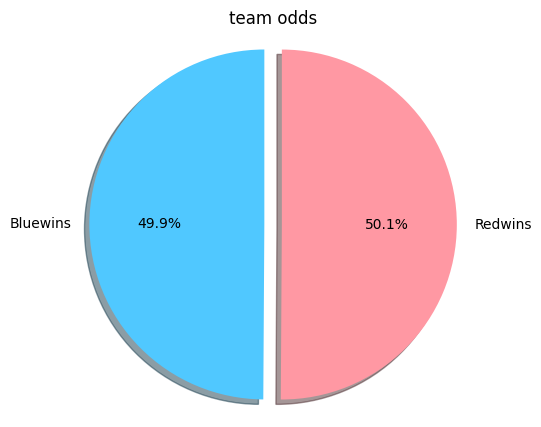

In [446]:
labels = 'Bluewins', 'Redwins'
sizes = [lol_data.blueWins[lol_data['blueWins'] == 1].count(), lol_data.blueWins[lol_data['blueWins'] == 0].count()]
colors = ['#50C8FF', '#FF98A3']
explode = (0, 0.1)
fig1,ax1 = plt.subplots(figsize = (5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
ax1.axis('equal')
plt.title('team odds')
plt.show()

### Total Team Diff

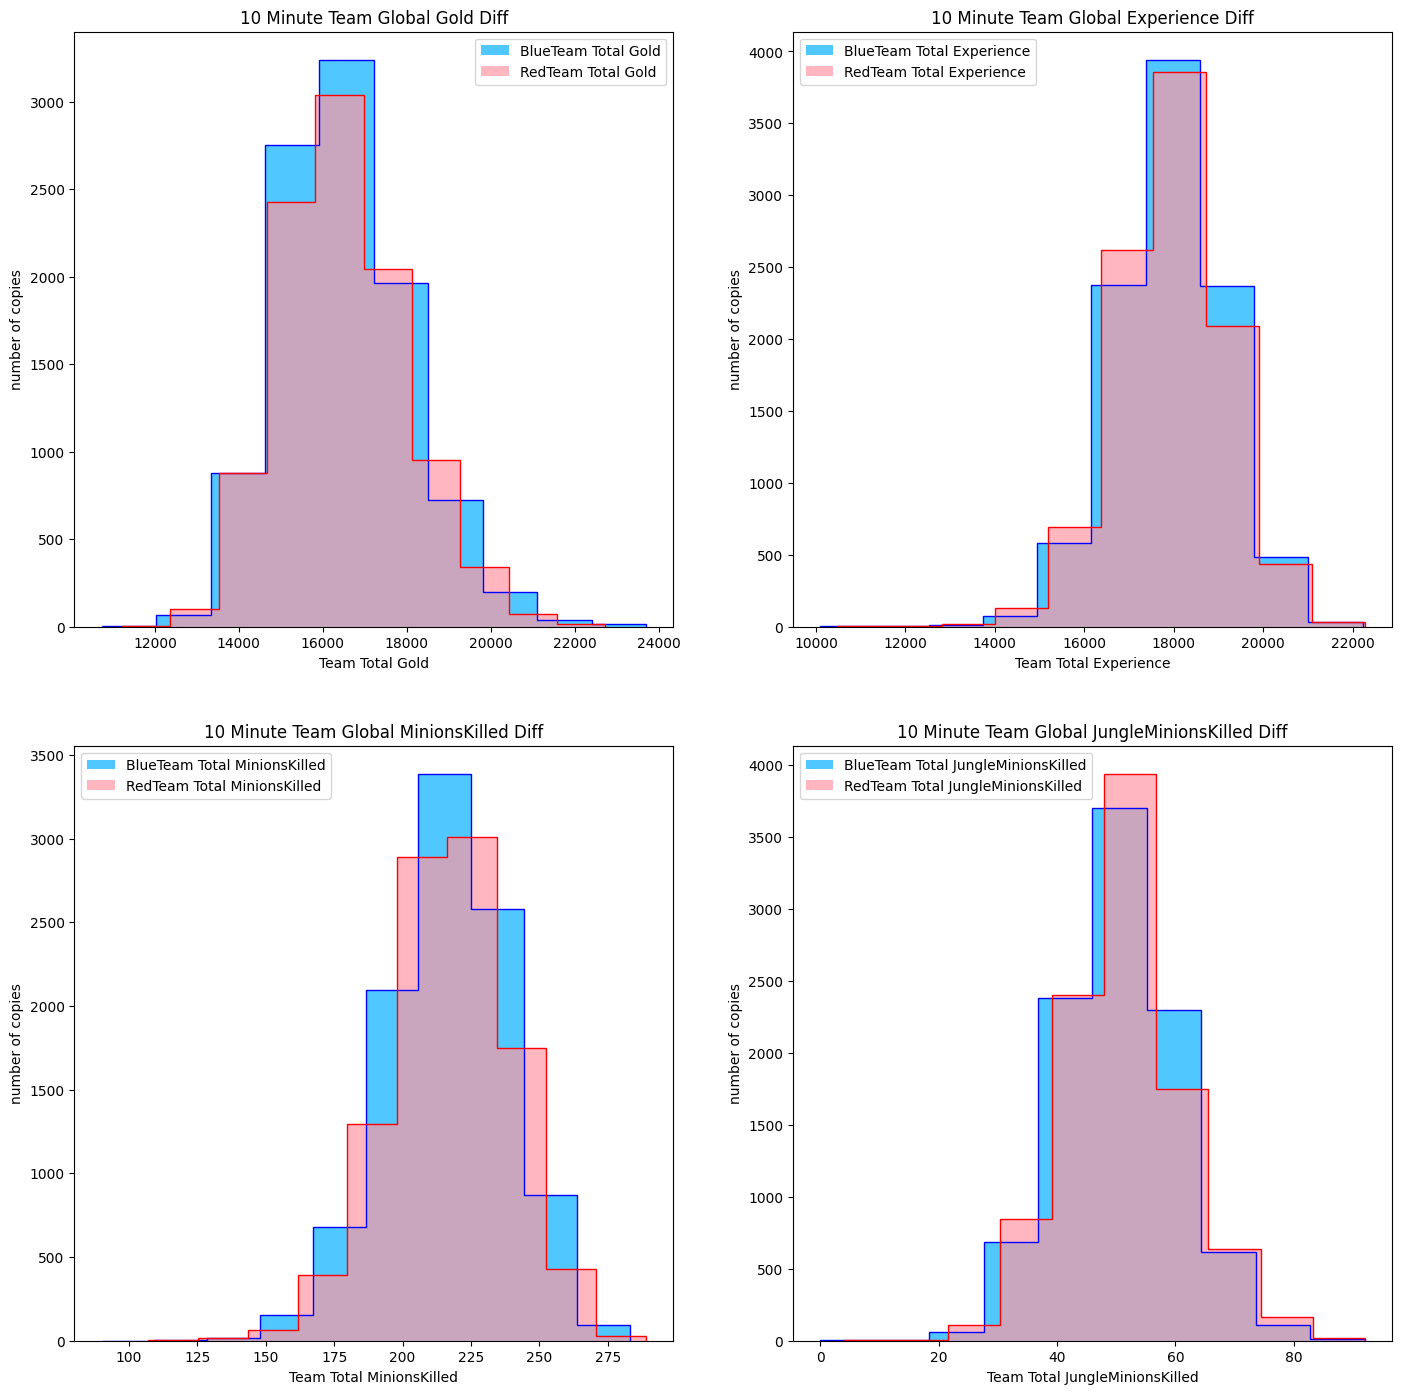

In [447]:
# Gold
team_gold = pd.DataFrame(lol_data['blueTotalGold'])
team_gold['redTotalGold'] = lol_data['redTotalGold']
team_gold['blueGold']= lol_data['blueGoldDiff']
team_gold['redGold'] = lol_data['redGoldDiff']

fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize=(17, 17))

axes[0, 0].hist(team_gold['blueTotalGold'], color = '#50C8FF', label = 'BlueTeam Total Gold')
axes[0, 0].hist(team_gold['redTotalGold'], color = '#FF98A3', alpha = 0.7, label = 'RedTeam Total Gold')
axes[0, 0].hist(team_gold['blueTotalGold'], histtype = 'step', color = 'b')
axes[0, 0].hist(team_gold['redTotalGold'], histtype = 'step', color = 'r')
axes[0, 0].set_xlabel('Team Total Gold')
axes[0, 0].set_ylabel('number of copies')
axes[0, 0].set_title('10 Minute Team Global Gold Diff')
axes[0, 0].legend()

# Experience

team_ex = pd.DataFrame(lol_data['blueTotalExperience'])
team_ex['redTotalExperience'] = lol_data['redTotalExperience']

axes[0, 1].hist(team_ex['blueTotalExperience'], color = '#50C8FF', label = 'BlueTeam Total Experience')
axes[0, 1].hist(team_ex['redTotalExperience'], color = '#FF98A3', alpha = 0.7, label = 'RedTeam Total Experience')
axes[0, 1].hist(team_ex['blueTotalExperience'], histtype = 'step', color = 'b')
axes[0, 1].hist(team_ex['redTotalExperience'], histtype = 'step', color = 'r')
axes[0, 1].set_xlabel('Team Total Experience')
axes[0, 1].set_ylabel('number of copies')
axes[0, 1].set_title('10 Minute Team Global Experience Diff')
axes[0, 1].legend()

# Minions killd

team_minions = pd.DataFrame(lol_data['blueTotalMinionsKilled'])
team_minions['redTotalMinionsKilled'] = lol_data['redTotalMinionsKilled']

axes[1, 0].hist(team_minions['blueTotalMinionsKilled'], color = '#50C8FF', label = 'BlueTeam Total MinionsKilled')
axes[1, 0].hist(team_minions['redTotalMinionsKilled'], color = '#FF98A3', alpha = 0.7, label = 'RedTeam Total MinionsKilled')
axes[1, 0].hist(team_minions['blueTotalMinionsKilled'], histtype = 'step', color = 'b')
axes[1, 0].hist(team_minions['redTotalMinionsKilled'], histtype = 'step', color = 'r')
axes[1, 0].set_xlabel('Team Total MinionsKilled')
axes[1, 0].set_ylabel('number of copies')
axes[1, 0].set_title('10 Minute Team Global MinionsKilled Diff')
axes[1, 0].legend()

# JungleMiniosKilled

team_jminions = pd.DataFrame(lol_data['blueTotalJungleMinionsKilled'])
team_jminions['redTotalJungleMinionsKilled'] = lol_data['redTotalJungleMinionsKilled']

axes[1, 1].hist(team_jminions['blueTotalJungleMinionsKilled'], color = '#50C8FF', label = 'BlueTeam Total JungleMinionsKilled')
axes[1, 1].hist(team_jminions['redTotalJungleMinionsKilled'], color = '#FF98A3', alpha = 0.7, label = 'RedTeam Total JungleMinionsKilled')
axes[1, 1].hist(team_jminions['blueTotalJungleMinionsKilled'], histtype = 'step', color = 'b')
axes[1, 1].hist(team_jminions['redTotalJungleMinionsKilled'], histtype = 'step', color = 'r')
axes[1, 1].set_xlabel('Team Total JungleMinionsKilled')
axes[1, 1].set_ylabel('number of copies')
axes[1, 1].set_title('10 Minute Team Global JungleMinionsKilled Diff')
axes[1, 1].legend()
plt.show()

In [448]:
# axes[0, 1].hist(team_gold['blueGold'], color = '#50C8FF', label = 'BlueTeam Gold diff')
# axes[0, 1].hist(team_gold['redGold'], color = '#FF98A3', alpha = 0.7, label = 'BlueTeam Gold diff')
# axes[0, 1].hist(team_gold['blueGold'], histtype = 'step', color = 'b')
# axes[0, 1].hist(team_gold['redGold'], histtype = 'step', color = 'r')
# axes[0, 1].set_xlabel('Team Diff Gold')
# axes[0, 1].set_ylabel('number of copies')
# axes[0, 1].set_title('10 Minute Gold Diff')
# axes[0, 1].legend()

## Global Blue Wins Graph

### 데이터 피처엔지니어링

In [449]:
# 퍼블 차이
firstblood = pd.DataFrame(lol_win_data['blueFirstBlood'])
firstblood['bluewins'] = lol_win_data['blueWins']
firstblood_l = list(firstblood['blueFirstBlood'])
firstblood_t = list(firstblood['bluewins'])


firstblood_tt = []

for f_l, f_t in zip(firstblood_l, firstblood_t):
    if f_l == 1:
        if f_t == 1:
            firstblood_tt.append(1)
        else:
            firstblood_tt.append(0)
    else:
        firstblood_tt.append(0)

firstblood_tt = pd.DataFrame(firstblood_tt)
firstblood['test'] = firstblood_tt

# 포블차이
r_m_lol_data = pd.DataFrame(m_lol_data['blueFirstTower'])
r_m_lol_data['blueWins'] = m_lol_data['blueWins']

r_m_lol_data = r_m_lol_data.astype(str)

win_m_lol_data = r_m_lol_data[r_m_lol_data['blueWins'].str.contains('0')].index
r_m_lol_data.drop(win_m_lol_data, inplace = True)
r_m_lol_data = r_m_lol_data.astype(int)

firsttower_l = list(r_m_lol_data['blueFirstTower'])
firsttower_t = list(r_m_lol_data['blueWins'])

firsttower_tt = []

for t_l, t_t in zip(firsttower_l, firsttower_t):
    if t_l == 1:
        if t_t == 1:
            firsttower_tt.append(1)
        else:
            firsttower_tt.append(0)
    else:
        firsttower_tt.append(0)

firsttower_tt = pd.DataFrame(firsttower_tt)
r_m_lol_data['test'] = firsttower_tt

# 골드 차이
gold_team = pd.DataFrame(lol_win_data['blueGoldDiff'])
gold_team['bluewins'] = lol_win_data['blueWins']
gold_team_l = list(gold_team['blueGoldDiff'])
gold_team_t = list(gold_team['bluewins'])


gold_team_tt = []

for g_l, g_t in zip(gold_team_l, gold_team_t):
    if g_l > 0:
        if g_t == 1:
            gold_team_tt.append(1)
        else:
            gold_team_tt.append(0)
    else:
        gold_team_tt.append(0)

gold_team_tt = pd.DataFrame(gold_team_tt)
gold_team['test'] = gold_team_tt

# 경험치 차이
ex_team = pd.DataFrame(lol_win_data['blueExperienceDiff'])
ex_team['bluewins'] = lol_win_data['blueWins']
ex_team_l = list(ex_team['blueExperienceDiff'])
ex_team_t = list(ex_team['bluewins'])


ex_team_tt = []

for e_l, e_t in zip(ex_team_l, ex_team_t):
    if e_l > 0:
        if e_t == 1:
            ex_team_tt.append(1)
        else:
            ex_team_tt.append(0)
    else:
        ex_team_tt.append(0)

ex_team_tt = pd.DataFrame(ex_team_tt)
ex_team['test'] = ex_team_tt

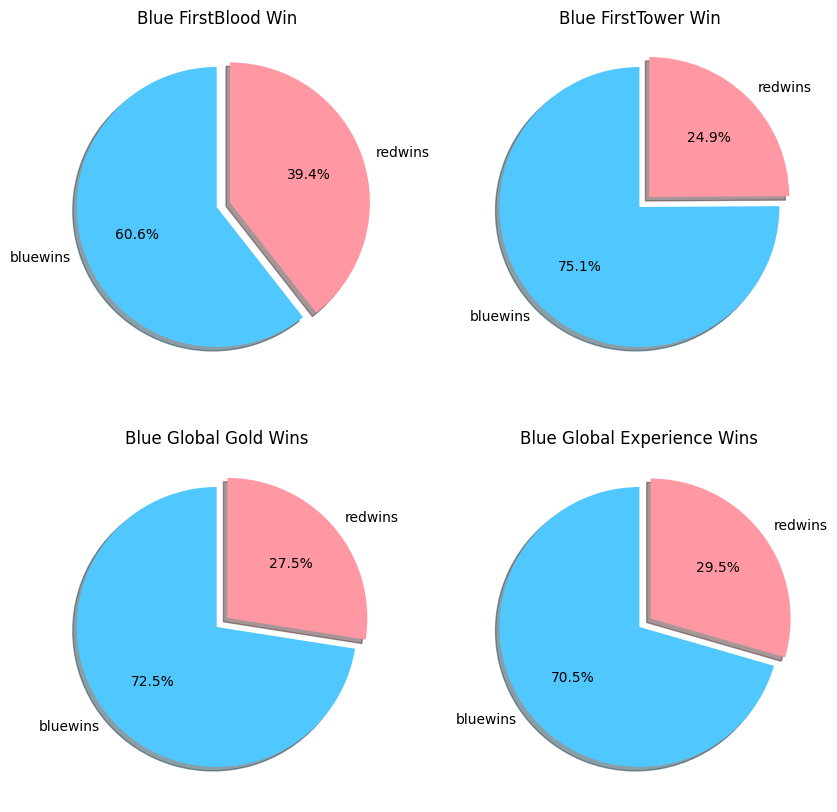

In [450]:
# 퍼블
labels = 'bluewins', 'redwins'
sizes = [firstblood.test[firstblood['test'] == 1].count(), firstblood.test[firstblood['test'] == 0].count()]
colors = ['#50C8FF', '#FF98A3']
explode = (0, 0.1)
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 10))
axes[0, 0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes[0, 0].set_title('Blue FirstBlood Win')

# 포블
sizes = [r_m_lol_data.test[r_m_lol_data['test'] == 1].count(), r_m_lol_data.test[r_m_lol_data['test'] == 0].count()]
axes[0, 1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes[0, 1].set_title('Blue FirstTower Win')

# 골드
sizes = [gold_team.test[gold_team['test'] == 1].count(), gold_team.test[gold_team['test'] == 0].count()]
axes[1, 0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes[1, 0].set_title('Blue Global Gold Wins')

# 경험치
labels = 'bluewins', 'redwins'
sizes = [ex_team.test[ex_team['test'] == 1].count(), ex_team.test[ex_team['test'] == 0].count()]
axes[1, 1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes[1, 1].set_title('Blue Global Experience Wins')
plt.show()

## Reference

[10분 전에 어떤 결정이 승리로 이어지나요?](https://www.kaggle.com/code/jeremyarancio/which-decisions-before-10min-lead-to-win)  
[리그 오브 레전드 10분 예측](https://www.kaggle.com/code/shengkunwang/league-of-legends-10-mins-prediction)  
[리그 오브 레전드 하이 엘로 랭크 게임(2020)](https://www.kaggle.com/datasets/gyejr95/league-of-legends-challenger-ranked-games2020)  
  

[[Python pandas] DataFrame의 문자열 칼럼을 숫자형으로 바꾸기 : pd.to_numeric(), DataFrame.astype()](https://rfriend.tistory.com/470)  
[[Python] 데이터프레임 합치기 :: pd.concat](https://mizykk.tistory.com/126)  
[[Pandas]특정조건 만족하는 인덱스(행),칼럼(열) 삭제하기](https://bohemihan.tistory.com/entry/Pandas-%ED%8A%B9%EC%A0%95%EC%A1%B0%EA%B1%B4-%EB%A7%8C%EC%A1%B1%ED%95%98%EB%8A%94-%EC%9D%B8%EB%8D%B1%EC%8A%A4%ED%96%89-%EC%B9%BC%EB%9F%BC%EC%97%B4-%EC%82%AD%EC%A0%9C%ED%95%98%EA%B8%B0)  
  
[Seaborn을 사용한 데이터 분포 시각화](https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html)  
[Matplotlib Tutorial](https://wikidocs.net/92094)